<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw2/scamSchool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scam School

Assignment 2<br>
Math 210 -- Chartier

Program: scamSchool.ipynb<br>
Author: Will Smith

Description: The Internet television show _Scam School_'s  May 2009 episode _Get lucky, ridiculously lucky 
with two new card tricks!_ host Brian Brushwood does a trick where you think of any two random card values from ace through king from a shuffled deck.  He then sees if the cards sit side by side in the deck.  In the episode, Brian Brushwood states that the probability is well above 50\%.  Let's use simulation to figure it out! 


If we run 5000 simulations of 50 games, we get the following distribution of the sample average win probability:

Mean:  0.484792
Standard deviation:  0.07040168134355884 



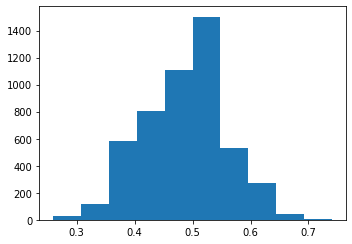

In [38]:
import numpy as np
from matplotlib import pyplot as plt 


print_output = False

num_sims = 5000
num_games = 50


win_probs = np.zeros(num_sims)

for sim in range(num_sims):
    num_wins = 0
    for game in range(num_games):
        
      # Shuffle a deck of cards by randomly ordering 52 numbers
      deck = np.random.permutation(52) + 1
      # Now turn those 52 numbers into 4 sets of numbers from 1 to 13.
      deck = np.mod(deck,13)+1

      # Pick two distinct numbers between 1 and 13.
      permute13 = np.random.permutation(13) + 1
      randomCardValue = permute13[0:2]

      # Where in the deck does the 1st card value appear?
      indicesOfCard1 = np.where(deck == randomCardValue[0])[0]
      # Where in the deck does the 2nd card value appear?
      indicesOfCard2 = np.where(deck == randomCardValue[1])[0]

      # Does the first card value come after the second?
      if (len(set(indicesOfCard1) & set(indicesOfCard2 + 1)) > 0):
        if print_output:
          print('The cards are side by side. Scam School wins!')
        num_wins += 1
      # Does the first card value come before the second?
      elif (len(set(indicesOfCard1) & set(indicesOfCard2 - 1)) > 0):
        if print_output: 
          print('The cards are side by side. Scam School wins!')
        num_wins += 1
      else:
        if print_output:
          print('The cards aren''t side by side. Scam School loses!')

    # Calculate results & print
    win_probs[sim] = num_wins/num_games

mean_win_prob = np.mean(win_probs)
std_win_prob = np.std(win_probs)

print('If we run 5000 simulations of 50 games, we get the following distribution of the sample average win probability:\n')
print('Mean: ', mean_win_prob)
print('Standard deviation: ', std_win_prob,'\n')
    
fig, ax = plt.subplots(figsize =(5, 3.5), tight_layout = True)
ax.hist(win_probs)
plt.show()